**Cavallin Jonathan** \
**Student ID**: 2159285

## Exercise 1

In [5]:
#1)

x <- seq(0,15,1)

dztbinom <- function(x,n,prob) {        # p(x=k) with k=1,2,..
    pmf <- rep(0,length(x))
    valid <- x>0 & x<=n
    pmf[valid] <- dbinom(x[valid],n, prob) / (1 - (1-prob)^n)
    return(pmf) }

pmf <- dztbinom(x,14,0.15)
pmf

pztbinom <- function(x,n,prob) {
    cmf <- rep(0,length(x))
    valid <- x >= 1 & x <= n
    cmf[valid] <- ( pbinom(x[valid],n, prob) - (1-prob)^n)/(1-(1-prob)^n)
    cmf[x<1] <- 0
    cmf[x>=n] <- 1
    return(cmf) }

cmf <- pztbinom(x,14,0.15)
cmf



[1] 0.000000e+00 2.829837e-01 3.245989e-01 2.291287e-01 1.111948e-01
 [6] 3.924522e-02 1.038844e-02 2.095148e-03 3.235154e-04 3.806064e-05
[11] 3.358292e-06 2.155054e-07 9.507589e-09 2.581246e-10 3.253671e-12
[16] 0.000000e+00

[1] 0.0000000 0.2829837 0.6075826 0.8367112 0.9479060 0.9871513 0.9975397
 [8] 0.9996348 0.9999584 0.9999964 0.9999998 1.0000000 1.0000000 1.0000000
[15] 1.0000000 1.0000000

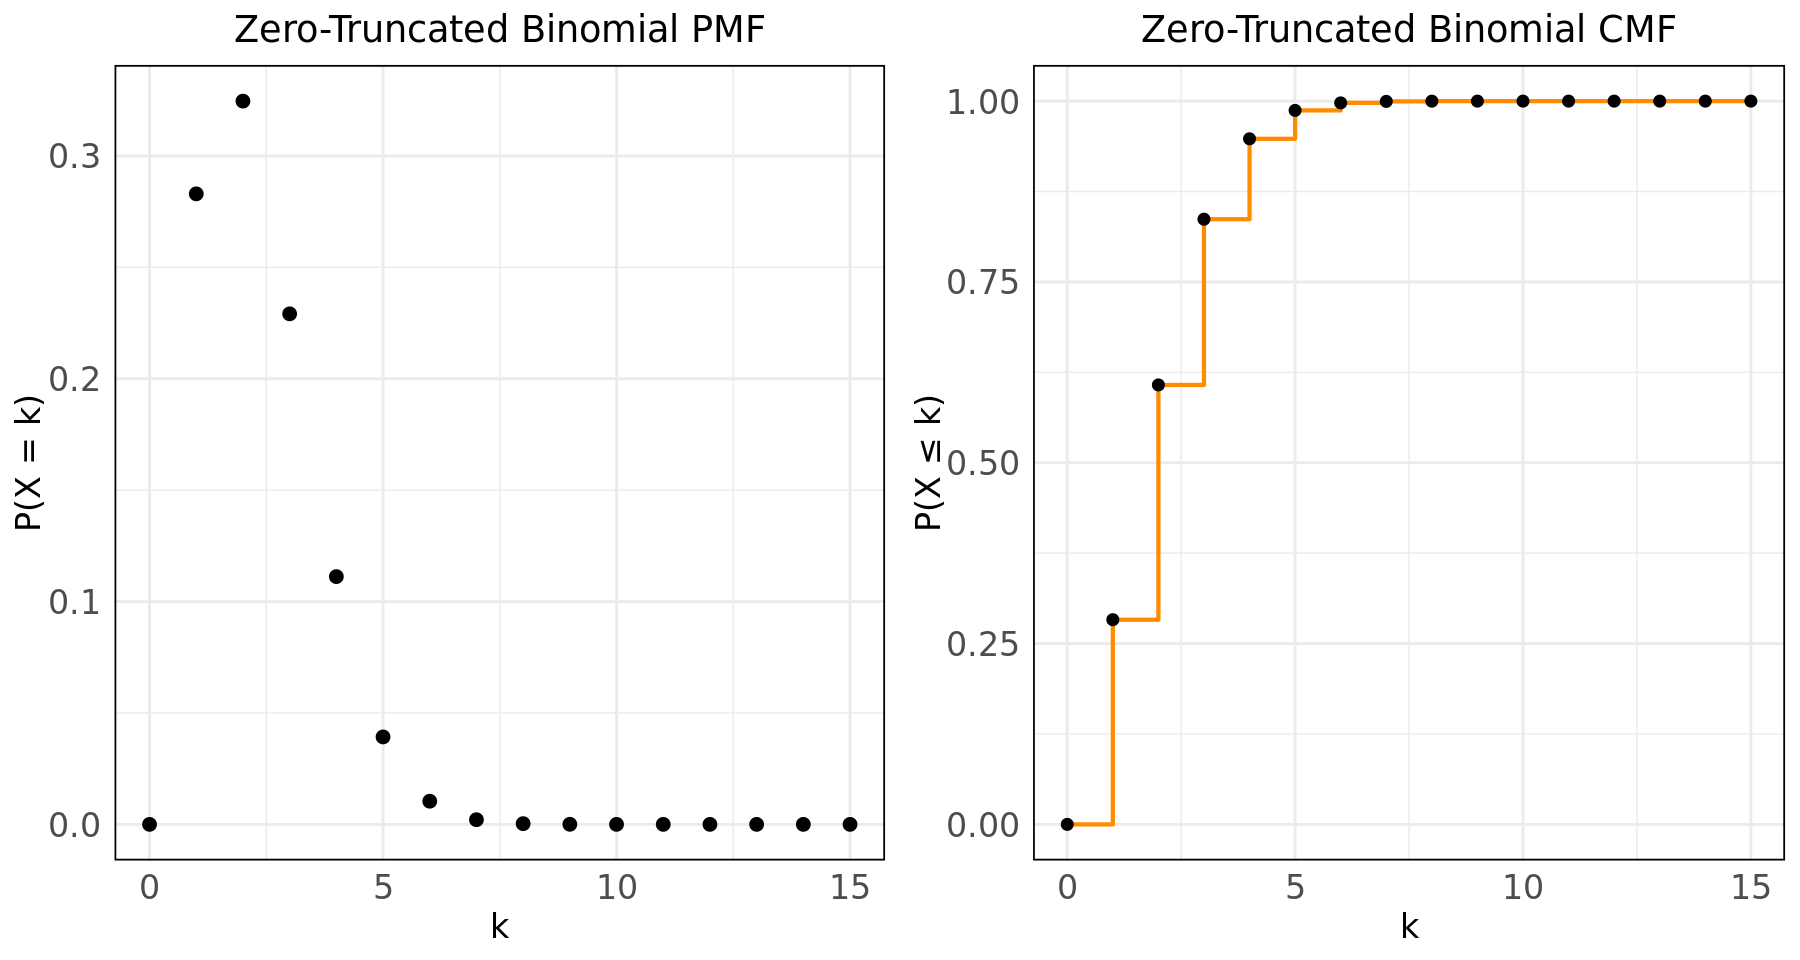

In [8]:
#2)
library('tidyverse')
library("IRdisplay")

df <- data.frame(x = x, PMF = pmf, CMF = cmf)

theme_set(
  theme_minimal(base_size = 18) +  # set base font size here
    theme(
      panel.border = element_rect(color = "black", fill = NA, linewidth = 1),  
      plot.title = element_text(hjust = 0.5, size = 22),
      axis.title = element_text(size = 20),
      axis.text = element_text(size = 20)
    )
)


pmf_hist <- ggplot(df, aes(x = x, y = PMF)) +
  geom_point(color = "black",size=3.5) +
  labs(title = "Zero-Truncated Binomial PMF",
       x = "k", y = "P(X = k)") 

cmf_hist <- ggplot(df, aes(x = x, y = CMF)) +
  geom_step(color = "darkorange", linewidth = 1.2) +
  geom_point(color = "black", size = 3) +
  labs(title = "Zero-Truncated Binomial CMF",
       x = "k", y = "P(X ≤ k)") 

library(gridExtra)
options(repr.plot.width = 15, repr.plot.height = 8)
grid.arrange(pmf_hist,cmf_hist,ncol=2)

In [9]:
#3) 

mean <- sum(x*pmf)
cat("Estimated mean:",mean,"\n")
var <- sum(x^2*pmf) - mean^2
cat("Estimated variance:",var,"\n")

binom_mean <- 14*0.15
binom_var <- 14*0.15*0.85       
cat("Binomial average:", binom_mean,"\n" )
cat("Binomial variance:",binom_var ) 


Estimated mean: 2.340536 
Estimated variance: 1.426472 
Binomial average: 2.1 
Binomial variance: 1.785

Sample mean: 2.339403 +- 1.195132

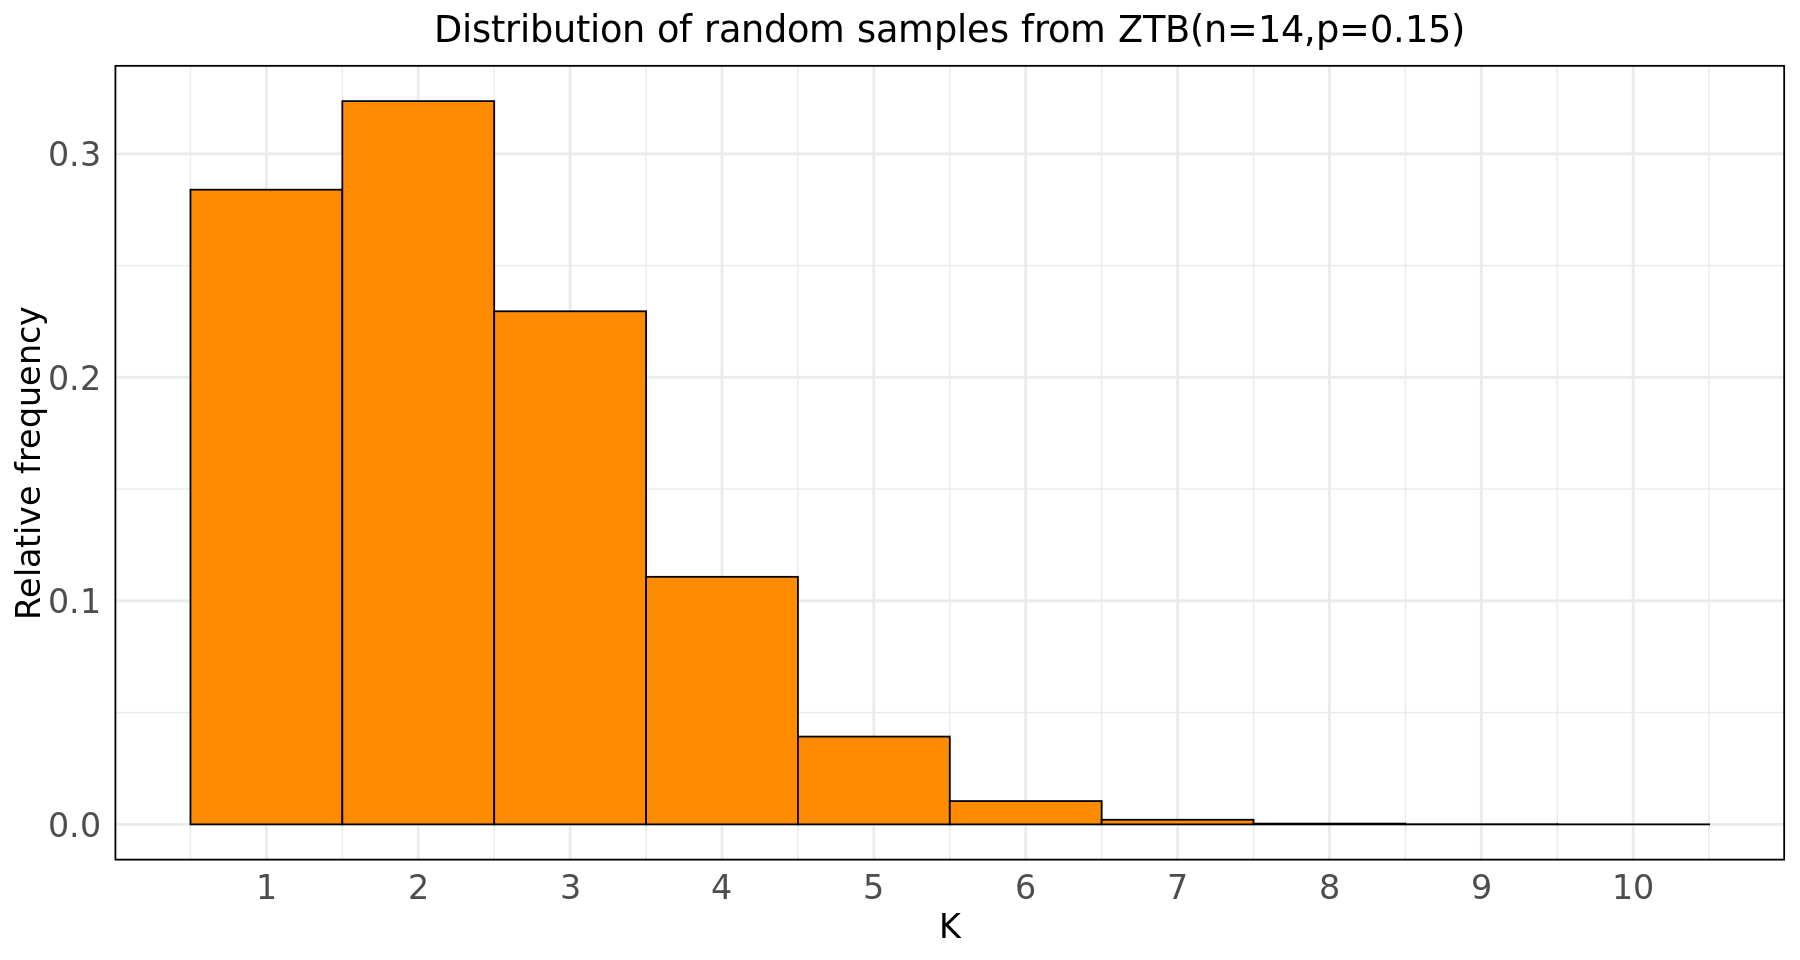

In [10]:
#4)
# function to sample from ZTB

rztbinom <- function(size, n, p) {
  sample <- integer(0)
  while (length(sample) < size) {
    x <- rbinom(size, n, p)
    x <- x[x > 0]  # keep only values x > 0
    sample <- c(sample, x)
  }
  return(sample[1:size])
}

sample <- rztbinom(1000000,14,0.15)
sample_mean <- mean(sample)
sample_std <- sd(sample)
cat("Sample mean:",sample_mean,"+-",sample_std)

df_2 <- data.frame(k = sample)

ggplot(df_2,aes(x=sample,y=PMF)) +
geom_histogram(aes(y = after_stat(density)),fill='darkorange',color='black',binwidth = 1)+
scale_x_continuous(breaks = seq(min(df_2$k), max(df_2$k), by = 1)) +
labs(title='Distribution of random samples from ZTB(n=14,p=0.15)', x='K',y='Relative frequency',fill = '',color = '')



## Exercise 2

In [27]:
#1)
E_0 <- 7.25
gamma <- 2.7

result <- integrate(function(x) (x-E_0+1)^(-gamma),E_0, +Inf) # integrate() returns a list with result, error, subdivions etc
integral <- result$value + E_0
N <- 1.0/integral
cat("N =",N)

N = 0.1275797

In [28]:
#2)
p_E <- function(E){
    p <- c()
    for(i in E){
    if(i<E_0){ p <- c(p,N)
     }
    else{
      p <- c(p,N*(i-E_0+1)^(-gamma) ) } }
 return(p)  
}

E <- seq(0,30,0.01)
pdf <- p_E(E)
pdf

[1] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
   [6] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
  [11] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
  [16] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
  [21] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
  [26] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
  [31] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
  [36] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
  [41] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
  [46] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
  [51] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
  [56] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
  [61] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
  [66] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
  [71] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
  [76] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
  [81] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
  [86] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
  [91] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
  [96] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [101] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [106] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [111] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [116] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [121] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [126] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [131] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [136] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [141] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [146] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [151] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [156] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [161] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [166] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [171] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [176] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [181] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [186] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [191] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [196] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [201] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [206] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [211] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [216] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [221] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [226] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [231] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [236] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [241] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [246] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [251] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [256] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [261] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [266] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [271] 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01 1.275797e-01
 [276] 1.275797e-01 1.275797e-01 1.275797e-

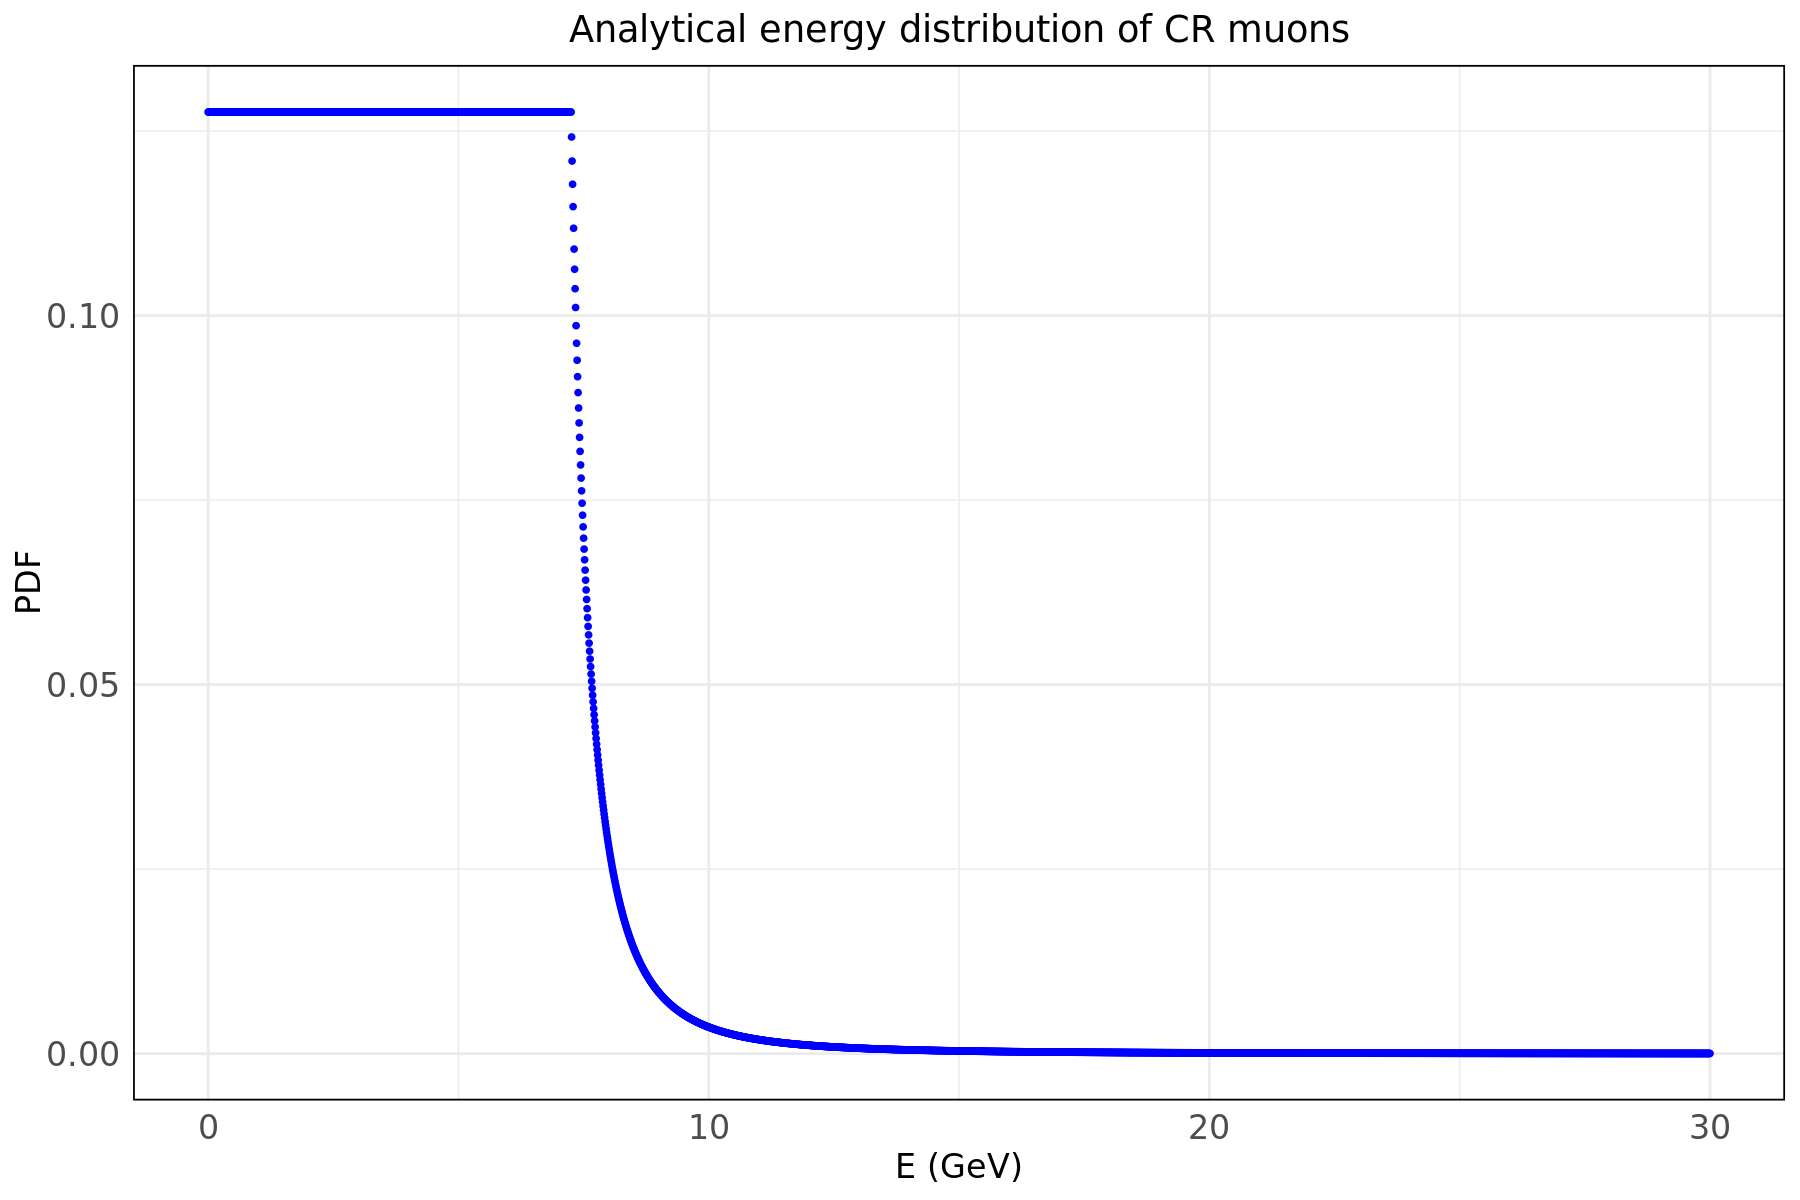

In [29]:
df_pdf <- data.frame(E=E,pdf= pdf)

options(repr.plot.width = 15, repr.plot.height = 10)

pdf_plot <- ggplot(df_pdf, aes(x = E, y = pdf)) +
  geom_point(color = "blue",size=1.5) +
  labs(title = "Analytical energy distribution of CR muons",
       x = "E (GeV)", y = "PDF") 

pdf_plot

In [30]:
#3)
library(pracma)

cdf_E <- function(E){
    pdf <- p_E(E)
    cdf <- c()
    for(i in 1:length(E)){
    cdf <- c(cdf, trapz(E[1:i], pdf[1:i]))  }
 return(cdf)  
}

# or just use cumulative trapezoidal integral
# cdf <- cumtrapz(E,p_E) 

cdf <- cdf_E(E)
cdf

[1] 0.000000000 0.001275797 0.002551595 0.003827392 0.005103189 0.006378987
   [7] 0.007654784 0.008930582 0.010206379 0.011482176 0.012757974 0.014033771
  [13] 0.015309568 0.016585366 0.017861163 0.019136960 0.020412758 0.021688555
  [19] 0.022964352 0.024240150 0.025515947 0.026791745 0.028067542 0.029343339
  [25] 0.030619137 0.031894934 0.033170731 0.034446529 0.035722326 0.036998123
  [31] 0.038273921 0.039549718 0.040825516 0.042101313 0.043377110 0.044652908
  [37] 0.045928705 0.047204502 0.048480300 0.049756097 0.051031894 0.052307692
  [43] 0.053583489 0.054859286 0.056135084 0.057410881 0.058686679 0.059962476
  [49] 0.061238273 0.062514071 0.063789868 0.065065665 0.066341463 0.067617260
  [55] 0.068893057 0.070168855 0.071444652 0.072720450 0.073996247 0.075272044
  [61] 0.076547842 0.077823639 0.079099436 0.080375234 0.081651031 0.082926828
  [67] 0.084202626 0.085478423 0.086754220 0.088030018 0.089305815 0.090581613
  [73] 0.091857410 0.093133207 0.094409005 0.095684802 0.096960599 0.098236397
  [79] 0.099512194 0.100787991 0.102063789 0.103339586 0.104615384 0.105891181
  [85] 0.107166978 0.108442776 0.109718573 0.110994370 0.112270168 0.113545965
  [91] 0.114821762 0.116097560 0.117373357 0.118649155 0.119924952 0.121200749
  [97] 0.122476547 0.123752344 0.125028141 0.126303939 0.127579736 0.128855533
 [103] 0.130131331 0.131407128 0.132682925 0.133958723 0.135234520 0.136510318
 [109] 0.137786115 0.139061912 0.140337710 0.141613507 0.142889304 0.144165102
 [115] 0.145440899 0.146716696 0.147992494 0.149268291 0.150544089 0.151819886
 [121] 0.153095683 0.154371481 0.155647278 0.156923075 0.158198873 0.159474670
 [127] 0.160750467 0.162026265 0.163302062 0.164577859 0.165853657 0.167129454
 [133] 0.168405252 0.169681049 0.170956846 0.172232644 0.173508441 0.174784238
 [139] 0.176060036 0.177335833 0.178611630 0.179887428 0.181163225 0.182439023
 [145] 0.183714820 0.184990617 0.186266415 0.187542212 0.188818009 0.190093807
 [151] 0.191369604 0.192645401 0.193921199 0.195196996 0.196472793 0.197748591
 [157] 0.199024388 0.200300186 0.201575983 0.202851780 0.204127578 0.205403375
 [163] 0.206679172 0.207954970 0.209230767 0.210506564 0.211782362 0.213058159
 [169] 0.214333957 0.215609754 0.216885551 0.218161349 0.219437146 0.220712943
 [175] 0.221988741 0.223264538 0.224540335 0.225816133 0.227091930 0.228367727
 [181] 0.229643525 0.230919322 0.232195120 0.233470917 0.234746714 0.236022512
 [187] 0.237298309 0.238574106 0.239849904 0.241125701 0.242401498 0.243677296
 [193] 0.244953093 0.246228891 0.247504688 0.248780485 0.250056283 0.251332080
 [199] 0.252607877 0.253883675 0.255159472 0.256435269 0.257711067 0.258986864
 [205] 0.260262661 0.261538459 0.262814256 0.264090054 0.265365851 0.266641648
 [211] 0.267917446 0.269193243 0.270469040 0.271744838 0.273020635 0.274296432
 [217] 0.275572230 0.276848027 0.278123825 0.279399622 0.280675419 0.281951217
 [223] 0.283227014 0.284502811 0.285778609 0.287054406 0.288330203 0.289606001
 [229] 0.290881798 0.292157595 0.293433393 0.294709190 0.295984988 0.297260785
 [235] 0.298536582 0.299812380 0.301088177 0.302363974 0.303639772 0.304915569
 [241] 0.306191366 0.307467164 0.308742961 0.310018759 0.311294556 0.312570353
 [247] 0.313846151 0.315121948 0.316397745 0.317673543 0.318949340 0.320225137
 [253] 0.321500935 0.322776732 0.324052530 0.325328327 0.326604124 0.327879922
 [259] 0.329155719 0.330431516 0.331707314 0.332983111 0.334258908 0.335534706
 [265] 0.336810503 0.338086300 0.339362098 0.340637895 0.341913693 0.343189490
 [271] 0.344465287 0.345741085 0.347016882 0.348292679 0.349568477 0.350844274
 [277] 0.352120071 0.353395869 0.354671666 0.355947464 0.357223261 0.358499058
 [283] 0.359774856 0.361050653 0.362326450 0.363602248 0.364878045 0.366153842
 [289] 0.367429640 0.368705437 0.369981234 0.371257032 0.372532829 0.373808627
 [295] 0.375084424 0.376360221 0.377636019 0.378911816 0.380187613 0.381463411
 [301] 0.382739208 0.384015005 0.385290803 0.38656660

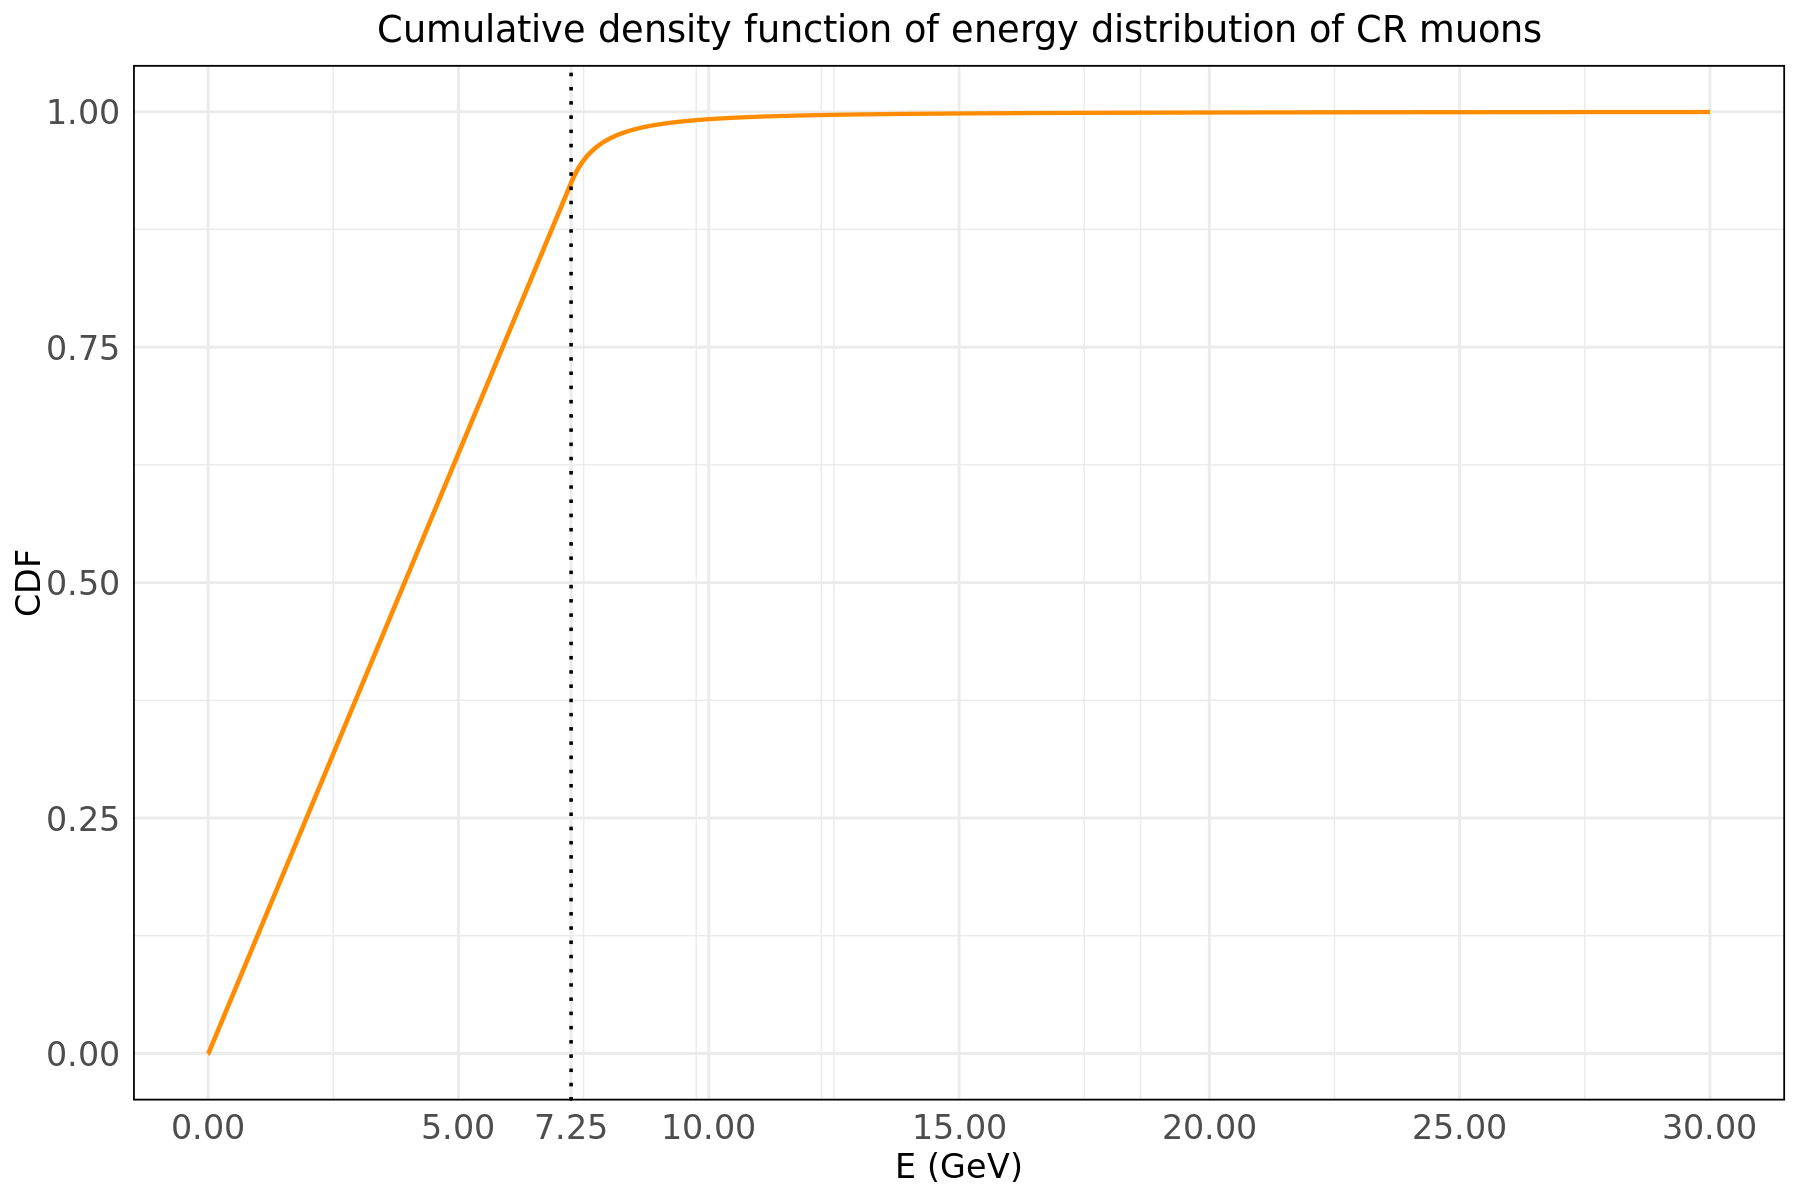

In [31]:
df_cdf <- data.frame(E=E,cdf= cdf)

cdf_plot <- ggplot(df_cdf, aes(x = E, y = cdf)) +
 geom_step(color = "darkorange", linewidth = 1.2) +
geom_vline(xintercept = 7.25, linetype = "dotted", color = "black", linewidth = 1) +
scale_x_continuous(breaks = c(pretty(df_cdf$E), 7.25)) +
  #geom_point(color = "black",size=0.1) +
  labs(title = "Cumulative density function of energy distribution of CR muons",
       x = "E (GeV)", y = "CDF") 

cdf_plot

In [32]:
#4)

mean_E <- trapz(E,E*pdf) # E_mean = integral (EdE)
cat("The estimated mean of the distribution is",mean_E,"GeV")

The estimated mean of the distribution is 3.982276 GeV

5)
Since the distribution admits an analytical expression for the CDF $F(E)$, to generate random samples from the distribution we use the Inverse Tranform method. \
We find:   \
$F^{-1}(z) =
\begin{cases}
\frac{z}{N} & \text{if } z < E_0N \\
\left[1 - (\gamma - 1)(\frac{z}{N} - E_0)\right]^{\frac{1}{1 - \gamma}} + E_0 - 1 & \text{if } z \geq E_0N
\end{cases}$
\
where: $ z\in [0,1]$. \
By drawing samples of  $z$ from a uniform distribution, we can sample data from the muons energy distribution p(E). 


In [33]:
calculate_N <- function(E_0=7.25,gamma=2.7){
E_0= 7.25
gamma= 2.7
result <- integrate(function(x) (x-E_0+1)^(-gamma),E_0, +Inf) 
integral <- result$value + E_0
N <- 1.0/integral
return(N)}

N <- calculate_N(7.25,2.7)

rmuon_distr <- function(z,E_0=7.25,gamma=2.7,N){
                    
    if(z<E_0*N){
    E <- z/N  
    }
    else{
    E <-  (1-(gamma-1)*(z/N-E_0))^(1/(1-gamma)) + E_0 -1    
    }
    return(E)
}

                    
samples <- c() 
N_samples <- 10^4
set.seed(42)
                    
for(i in 1:N_samples){
    z <- runif(1)
    E <- rmuon_distr(z,E_0,gamma,N) 
    samples <- c(samples,E)
}
samples

[1]  7.170465091  7.359193560  2.242829024  6.509243959  5.030152428
    [6]  4.068796231  5.773552584  1.055548486  5.149660212  5.526463732
   [11]  3.587887783  5.636571089  7.335006719  2.002111247  3.623559955
   [16]  7.390847225  8.320711490  0.920893594  3.723138928  4.392019953
   [21]  7.086010800  1.087242943  9.326458111  7.472539425  0.646164984
   [26]  4.030512998  3.058506619  7.099388658  3.503453150  6.552798164
   [31]  5.781448063  6.357241099  3.042084072  5.370521611  0.030948009
   [36]  6.528592284  0.057486770  1.627679907  7.106155225  4.795265005
   [41]  2.975074666  3.415680253  0.293393246  8.096369604  3.384167912
   [46]  7.648691663  6.958431904  5.016304230  7.998271729  4.850599528
   [51]  2.613480962  2.717894385  3.123422448  6.150606673  0.305193382
   [56]  5.869234484  5.308655209  1.342410133  2.046468914  4.032089662
   [61]  5.295568839  8.630187696  5.953486747  4.440269605  6.660068010
   [66]  1.485141303  2.126408340  6.491301135  5.433502545  1.885446287
   [71]  0.336956302  1.101108205  1.696079815  3.757638785  1.547348728
   [76]  5.638480374  0.061802438  2.943178723  4.032048696  0.012310374
   [81]  4.558749067  1.237698189  2.814148367  5.060614628  6.081086126
   [86]  4.417996612  1.831822246  0.705288466  0.671047516  2.392373421
   [91]  5.231446117  0.001872528  1.634820415  7.319314553  7.255461410
   [96]  5.754003919  2.610696603  4.037187612  5.831448391  4.853115858
  [101]  4.908658413  1.702133152  1.697505558  3.048642682  7.419072543
  [106]  7.756513938  5.799159822  5.747353997  4.199423096  0.017816043
  [111]  4.772995082  6.559047585  5.890610736  3.548616627  4.199648083
  [116]  4.212085023  0.010823377  2.787793461  4.798043241  6.497443531
  [121]  2.796070994  3.218654769  4.495039078  4.622037339  5.640843247
  [126]  3.095891695  7.204936754  7.755620691  1.830412359  5.678782717
  [131]  7.082900101  4.730171919  4.949902850  7.362425149  6.666283982
  [136]  4.544772682  6.438357293  0.891353225  5.992391758  4.888029060
  [141]  1.163559444  0.629131781  3.637486373  6.108871093  5.749564801
  [146]  6.405644579  1.333773580  7.447011878  2.301492780  1.168461835
  [151]  5.638658722  2.540261977  6.104492162  3.091721414  5.318970622
  [156]  6.081099295  1.472561787  0.227981495  1.063756685  5.331286922
  [161]  7.336481795  4.314902206  4.716785394  1.544089165  4.195310535
  [166]  1.407400147  3.541992706  2.485138798  0.910604411  1.458712508
  [171]  5.719796258  3.228350238  3.245418862  3.764783844  3.350802243
  [176]  1.069843569  6.464031296  4.642620066  6.226670492  6.027857164
  [181]  7.195942286  6.761495234  2.484526522  2.032145418  5.818059161
  [186]  5.857992343  7.194747870  6.217219395  1.045068930  2.255450287
  [191]  1.525917437  6.146033901  1.010130337  1.011832189  0.566336893
  [196]  0.416441397  4.168957022  0.880298433  5.825280275  5.732222844
  [201]  6.937760765  4.053238168  6.677635583  3.470741374  1.237501388
  [206]  3.467044631  7.892998776  3.798314251  1.978828671  2.035511189
  [211]  4.248448521  5.093879780  2.636932344  0.477738457  3.537480671
  [216]  6.574359374  4.504142682  2.769643428  4.290854451  6.997338462
  [221]  3.840661424  1.345292901  4.256404747  7.730126292  2.458727630
  [226]  6.431386156  2.406764664  1.453628820  0.378953416  1.925651792
  [231]  2.752058697  1.246454858  2.383591676  0.137547900 12.373108934
  [236]  6.305024118  0.678639135  6.818741728  4.346974533  3.302863252
  [241]  0.530153308  4.400682852  0.554334853  1.656939773  4.308054167
  [246]  3.777884039  1.249962255  1.172435370  3.913418353  7.397049536
  [251]  2.619783807  1.476992628  2.114098890  4.160097008  0.168131940
  [256]  6.260871298  0.864832486  4.231066019  4.477465742  4.851487911
  [261]  5.603191508  0.966458958  2.438080125  7.460182323  3.919314367
  [266]  1.059968482  6.813447399  1.607227123  7.250728141  6.950583422
  [271]  1.068318759  6.155753779  3.553098856  1.063981034  6

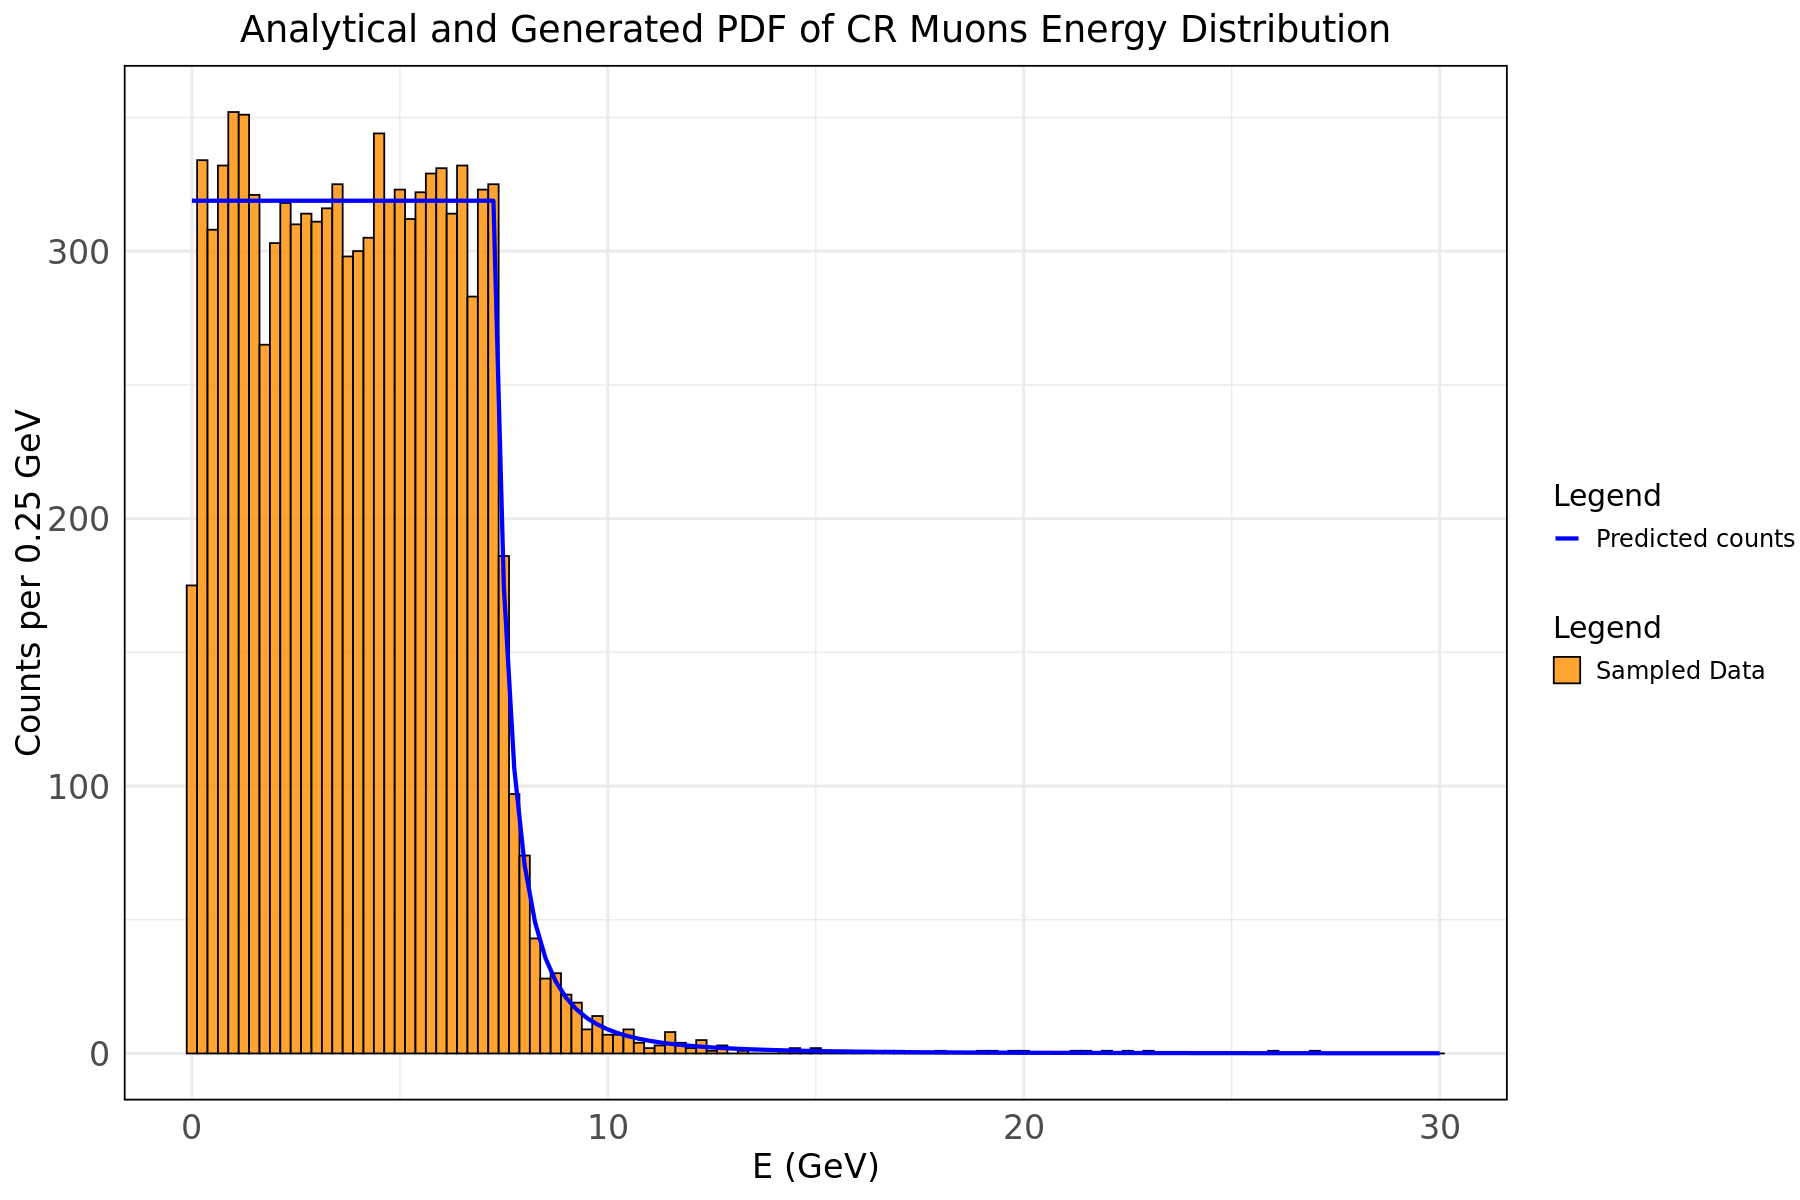

In [34]:
df_samples <- data.frame(E=samples[samples<30])
total_samples <- nrow(df_samples)  

E_vals <- seq(0, 30, by = 0.25)
pdf <- p_E(E_vals)
scaled_pdf <- pdf * total_samples * 0.25

df_pdf <- data.frame(E = E_vals, th_counts = scaled_pdf)

ggplot() +
  geom_histogram(
    data = df_samples,
    aes(x = E, fill = "Sampled Data"),
    binwidth = 0.25,
    color = "black",
    alpha = 0.8) +
  geom_line(
    data = df_pdf,
    aes(x = E, y = th_counts, color = "Predicted counts"), linewidth = 1.2) +
  scale_fill_manual(name = "Legend", values = c("Sampled Data" = "darkorange")) +
  scale_color_manual(name = "Legend", values = c("Predicted counts" = "blue")) +
  labs(
    title = "Analytical and Generated PDF of CR Muons Energy Distribution",
    x = "E (GeV)",
    y = "Counts/0.25 GeV"
  ) 

## Exercise 3
The average number of requests to a small web server is 7 per day. \
a) Find a bound for the probability that at least 30 web server requests will occur tomorrow. 

We can use Markov's inequality with $E[x]=\mu=7$: \
$P(X\geq30) \leq \frac{\mu}{30}$, thus $P(X\geq30) \leq 7/30$.

b) Provided that we get al large number of requests, the average number of requests per day follows a Poisson distribution with $\lambda=7$. So:

In [13]:
lambda <- 7
x <- 0:29
probs <- dpois(x,lambda)
p_greater_30 <- 1- sum(probs)
cat("The prabability to ge at least 30 server requests is", p_greater_30 )


The prabability to ge at least 30 server requests is 9.982992e-11

c) Let the variance of the number of requests be 5 per day, find a bound on the probability that
tomorrow at least 30 requests will occur. 

Since the variance of the process is known, here we can use Chebyshev's inequality to bound the probability: \
$P(|X-\mu| \geq k) \leq \frac{\sigma^2}{k^2}$; thus, since $X\geq0$, choosing $k=23$ we have:\
$P(X \geq 30) \leq \frac{\sigma^2}{23^2} \approx 0.0095$.



## Exercise 4

A photon detector measures an average of 350 light particles per second with a standard deviation
of 75 particles. How many minutes an experimentalist must run the detector to be 95% confident of collecting
at least 1 million signals?

For the Central Limit Theorem, for large enough times n, the sum of the number of particles $X(t\leq n)$ observed until time n follows a normal distribution. In particular, if $X_i$ is the number of particles observed at the i-th interval of 1 second, with $\mu=E[X_i]=350$ and $\sigma=75$, we have:

$$
z = \frac{\sum_{i=1}^{n} X_i - \mu n}{\sigma \sqrt{n}} \xrightarrow{n \to \infty} \mathcal{N}(0, 1)
$$
So, we need to find n such that z has a normal cumulative PDF greater than 95%, corresponding to the value $z^{*}$:

In [11]:
z_star= qnorm(0.95) # q gives the quantile value
z_star

[1] 1.644854

So now one needs to solve for n:
$$ z^{*} = \frac{10^6-350n}{75\sqrt{n}}  \rightarrow  75^2(z^{*})^{2}n= (10^6-350n)^2$$

In [26]:
a <- 350^2
b <- -75^2* z_star^2-2*10^6*350
c <- 10^12
n <- (-b + (b^2-4*a*c)^0.5)/(2*a)

cat("The experimentalist must run the detector for",n/60,"minutes")

The experimentalist must run the detector for 47.93409 minutes

## Exercise 5

Let a small community be composed of 1000 people. Initially, 5 people know a rumor, and 995 people don’t. Every person who knows the rumor spreads it to one randomly chosen person, including those who
already know it. \
a) Simulate how the rumor spreads over 15 interactions using R.

In [62]:
n <- rep(FALSE,1000)
initial_idx <- sample(1000, 5) ## randomly smaple five indeces of people who initially know the rumor
n[initial_idx] = TRUE

num_trues <- c()
for (i in 1:15){    
    new_idx <- sample(1000,length(n[n==TRUE]), replace = TRUE)
    n[new_idx] = TRUE 
    num_trues <- c(num_trues,length(n[n==TRUE]))
} 

cat("Number of people who know the rumor after 15 iterations (one simulation):",length(n[n==TRUE]))

Number of people who knows the rumor after 15 iterations (one simulation): 999

Now let's perform multiple runs and show how the number of people who know the rumor evolvs over the iterations.

In [68]:

runs_df <- data.frame()

for (j in 0:5){
n <- rep(FALSE,1000)
initial_idx <- sample(1000, 5) ## randomly smaple five indeces of people who initially know the rumor
n[initial_idx] = TRUE

num_trues <- c()
for (i in 1:15){    
    new_idx <- sample(1000,length(n[n==TRUE]), replace = TRUE)
    n[new_idx] = TRUE 
    num_trues <- c(num_trues,length(n[n==TRUE]))
} 
    
  runs_df <- rbind(runs_df, data.frame(
    iteration = 1:15,
    known = num_trues,
    run = as.factor(j)
  ))
}
runs_df

iteration,known,run
<int>,<int>,<fct>
1,10,0
2,20,0
3,39,0
4,78,0
5,149,0
6,260,0
7,434,0
8,636,0
9,824,0


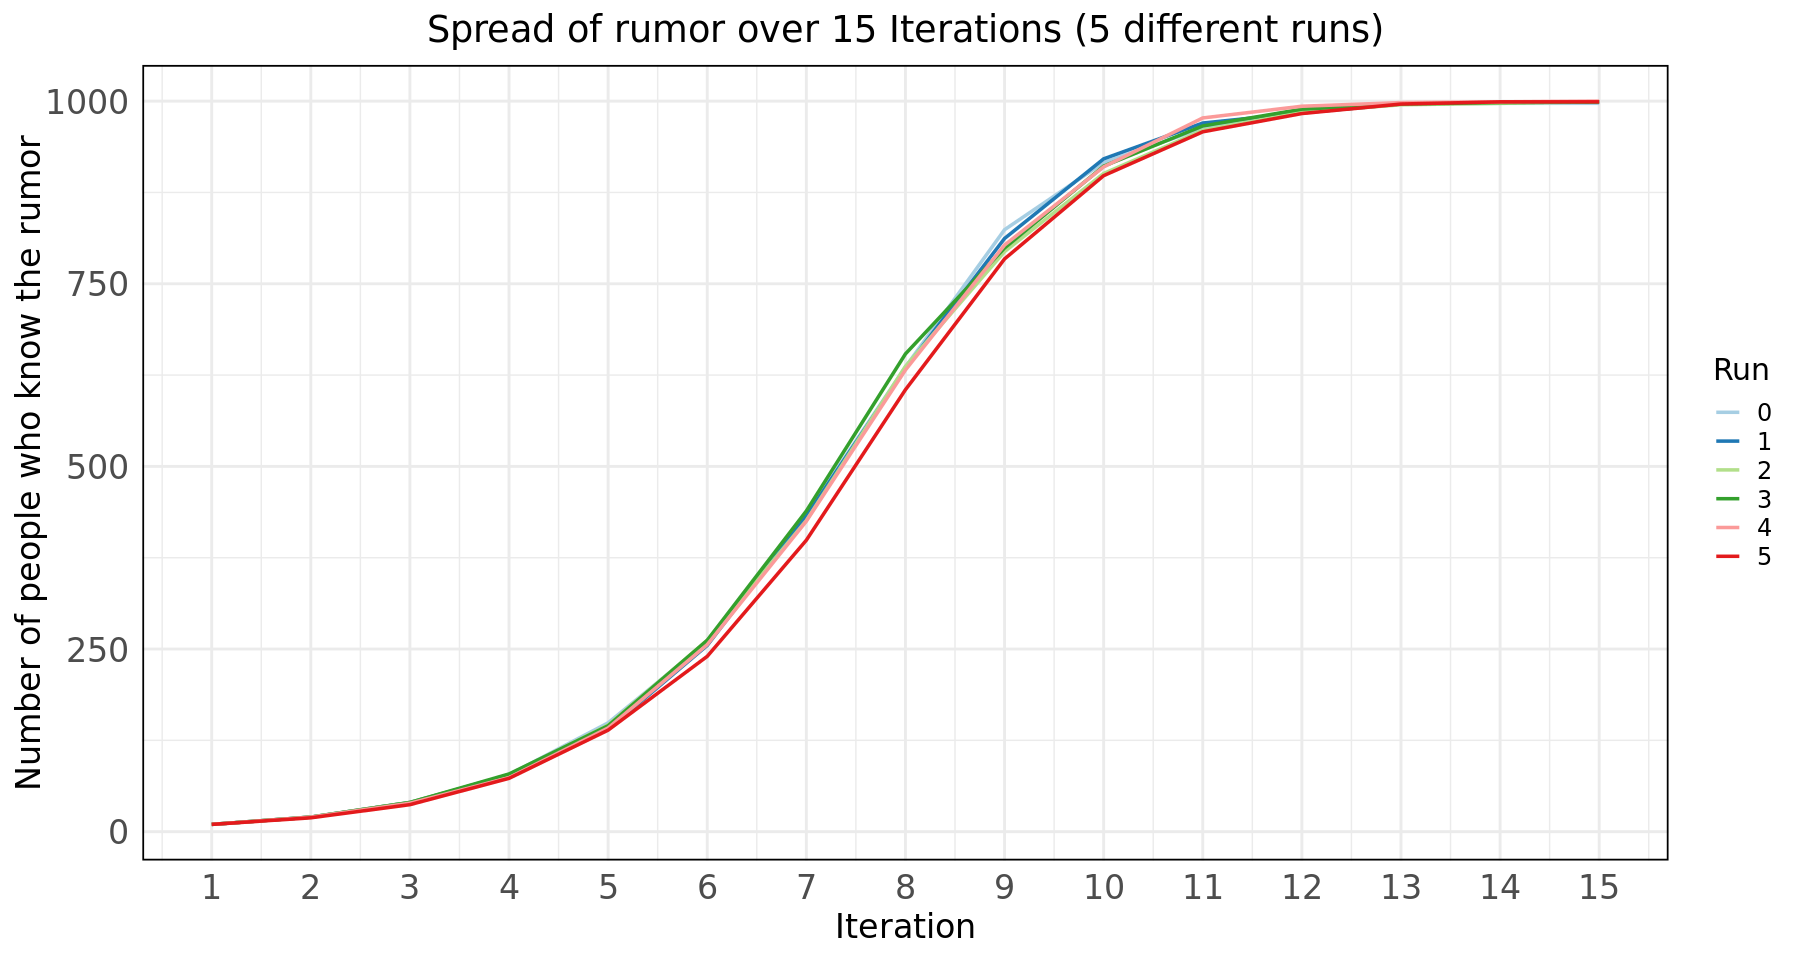

In [79]:
ggplot(runs_df, aes(x=iteration,y=known,color=run) )+
geom_line(linewidth=1)+
scale_color_brewer(palette = "Paired")+
scale_x_continuous(breaks = 1:15)+  
 labs(
    title = "Spread of rumor over 15 Iterations (5 different runs)",
    x = "Iteration",
    y = "Number of people who know the rumor",
    color = "Run"
  )

b) Evaluate the mean number of people who know the rumor after 15 interactions. 

We perform a high number of runs and estimate the mean values of the number of people knowing the rumor after 15 iterations.


In [84]:
runs_df <- data.frame()

for (j in 0:1000){
n <- rep(FALSE,1000)
initial_idx <- sample(1000, 5) ## randomly smaple five indeces of people who initially know the rumor
n[initial_idx] = TRUE

num_trues <- c()
for (i in 1:15){    
    new_idx <- sample(1000,length(n[n==TRUE]), replace = TRUE)
    n[new_idx] = TRUE 
    num_trues <- c(num_trues,length(n[n==TRUE]))
} 
    
  runs_df <- rbind(runs_df, data.frame(
    iteration = 1:15,
    known = num_trues,
    run = as.factor(j)
  ))
}
runs_df

iteration,known,run
<int>,<int>,<fct>
1,10,0
2,19,0
3,38,0
4,76,0
5,142,0
6,250,0
7,408,0
8,605,0
9,779,0


In [89]:
avg_know <- runs_df |> filter(iteration==15) |> summarise(mean=mean(known),std= sd(known)) 
cat("The average number of people knowing the rumor after 15 iterations is", avg_know|>pull(mean),"+-",avg_know|>pull(std))

The average number of people knowing the rumor after 15 iterations is 999.3506 +- 0.8123559

c) Find an upper bound for the probability of at least 500 people knowing the rumor after 15
interactions. 

We can use  Chebyshev's inequality to bound the probability, with X the number of people knowing the rumor after 15 iterations. We have estimated $E[x]=\mu \approx 999.35$, with $\sigma \approx 0.81$. Thus:\
$$P(|X-\mu| \geq k) \leq \frac{\sigma^2}{k^2}$$ \
From which:

$$P(X \leq \mu - k) \leq \frac{\sigma^2}{k^2}$$ 

Choosing $k\approx 499.35$, we get: 

$$P(X \leq 500) \leq (\frac{0.81}{499.35})^2 \approx 2.63 \cdot 10^{-6}$$
Finally:
$$P(X > 500) = 1-P(X \leq 500) \geq 0.99999737 $$

## Exercise 6

In a stationary bus at the departure station, a passenger gets on the bus, on average every 30
seconds. \
a) Compute the probability of getting more than 6 passenger after 2 minutes.

On average 4 passengers get on the bus every 2 minutes. We can model the PDF as a Poissonian with $\lambda=4$.

In [2]:
x <- 0:6
pdf <- dpois(x,lambda=4)
prob <- 1-sum(pdf)
cat("The probability of getting more than 6 passengers in 2 minutes is:",prob)

The probability of getting more than 6 passengers in 2 minutes is: 0.110674

a) Evaluate the probability
of having less than 4 passenger after 3 minutes.

On average 6 passengers get on the bus every 3 minutes.

In [3]:
x <- 0:3
pdf <- dpois(x,lambda=6)
prob <- sum(pdf)
cat("The probability of getting less than 4 passengers in 3 minutes is:",prob)

The probability of getting less than 4 passengers in 3 minutes is: 0.1512039

b) Simulate the distribution of the arrival time of the third passenger and superimpose the corresponding pdf.

The time of occurrance of the n-th event of a Poisson process follows a Gamma distribution: $Gamma(n,\lambda)$.

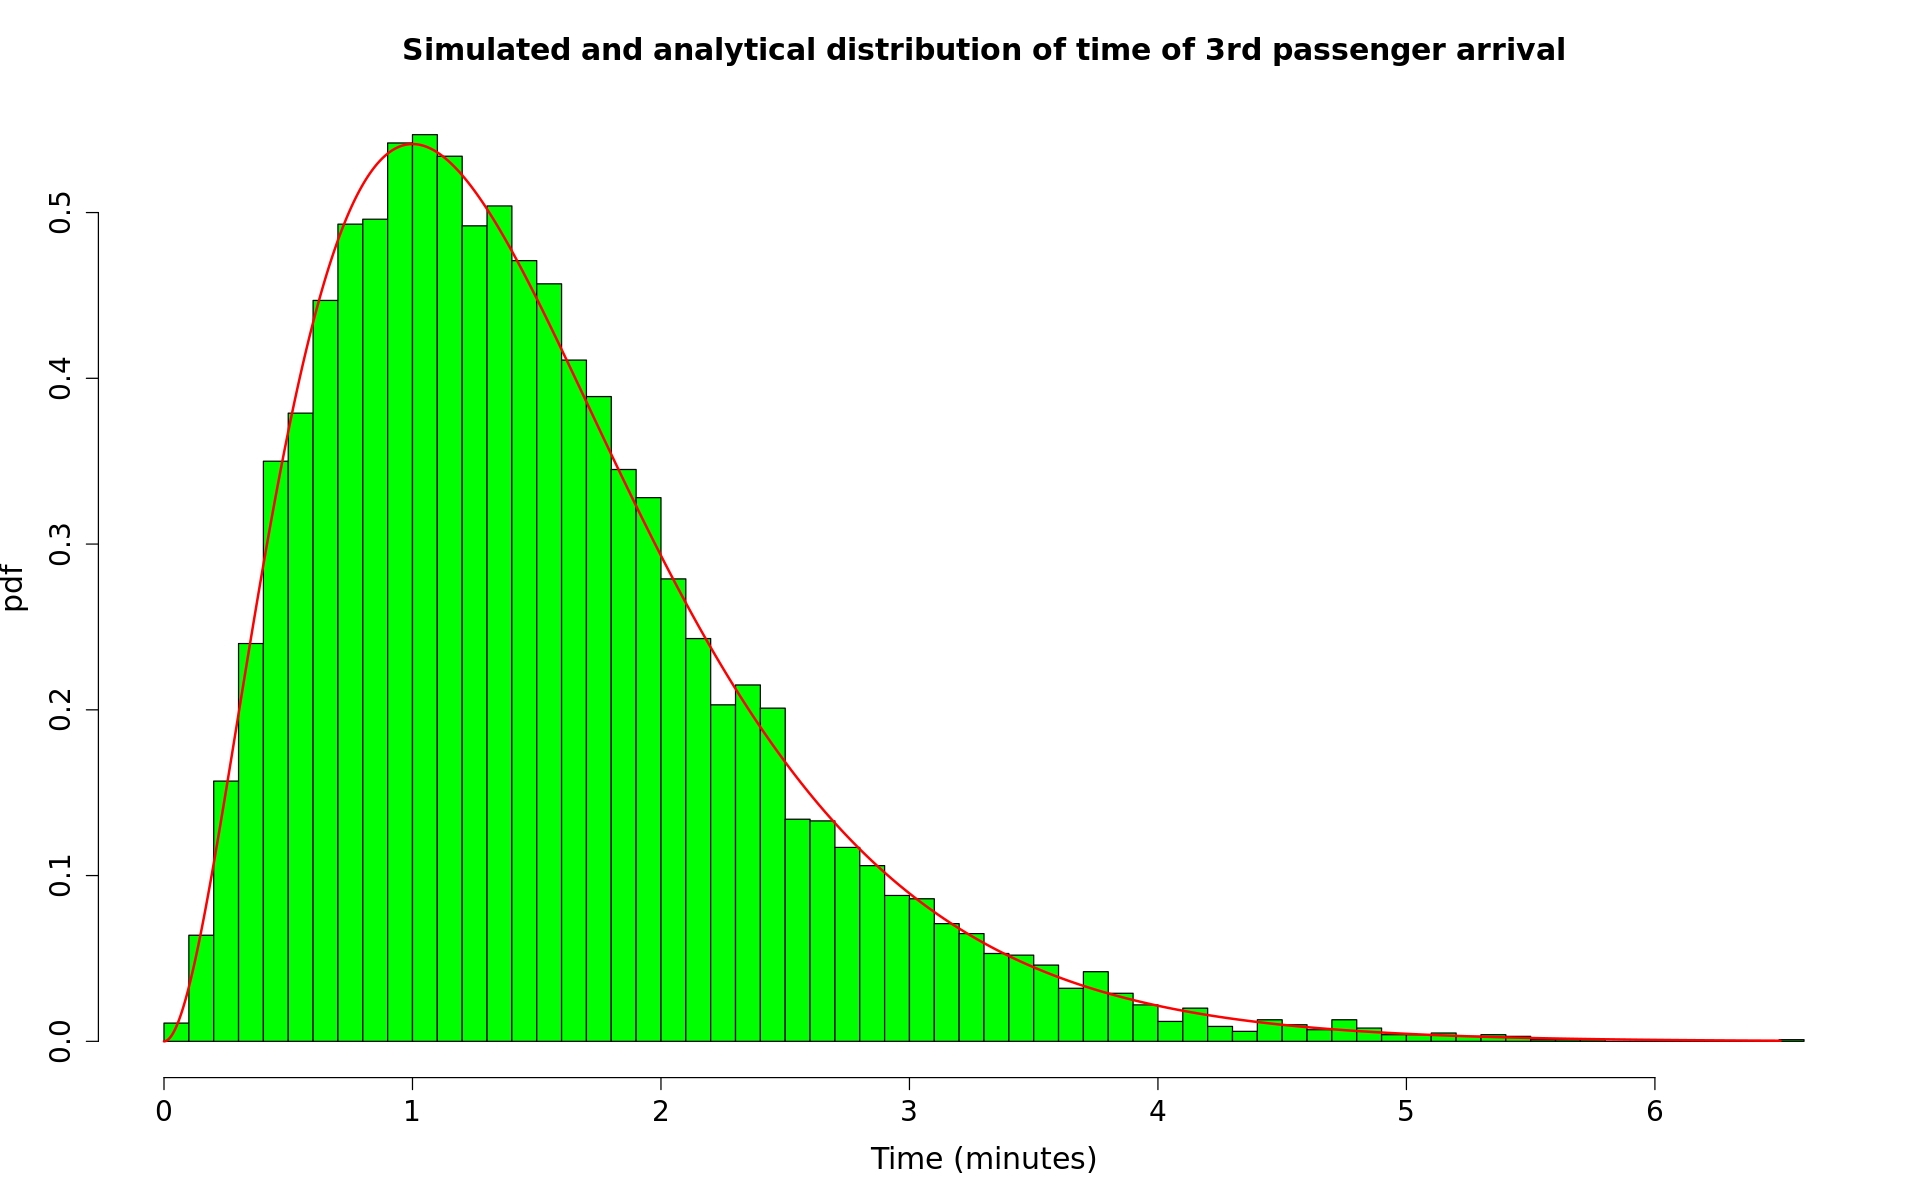

In [34]:
lambda <- 2 # 1 minute as unit 
sample_times <- rgamma(10000,3,lambda)


x <- seq(0,max(sample_times), length.out=10000)
pdf <- dgamma(x,3,lambda)

options(repr.plot.width = 16, repr.plot.height = 10)

hist(sample_times,breaks=50,probability = TRUE,col='green',xlab='Time (minutes)',ylab='pdf',
     main='Simulated and analytical distribution of time of 3rd passenger arrival',
     cex.axis=1.4,cex.lab=1.5, cex.main = 1.5);
lines(x,pdf,type='l',col='red',lwd=2)



c) Repeat the procedure of the point b) for the difference in arrival time between the fifth and the
first passenger.

Because of the memory-less property of a Poisson process, the PDF of the difference between the arrival of the 1st and the 5th passenger is the same as the PDF of the arrival time of the 4th passenger, thus it follows a Gamma distribution: $Gamma(4,\lambda)$.

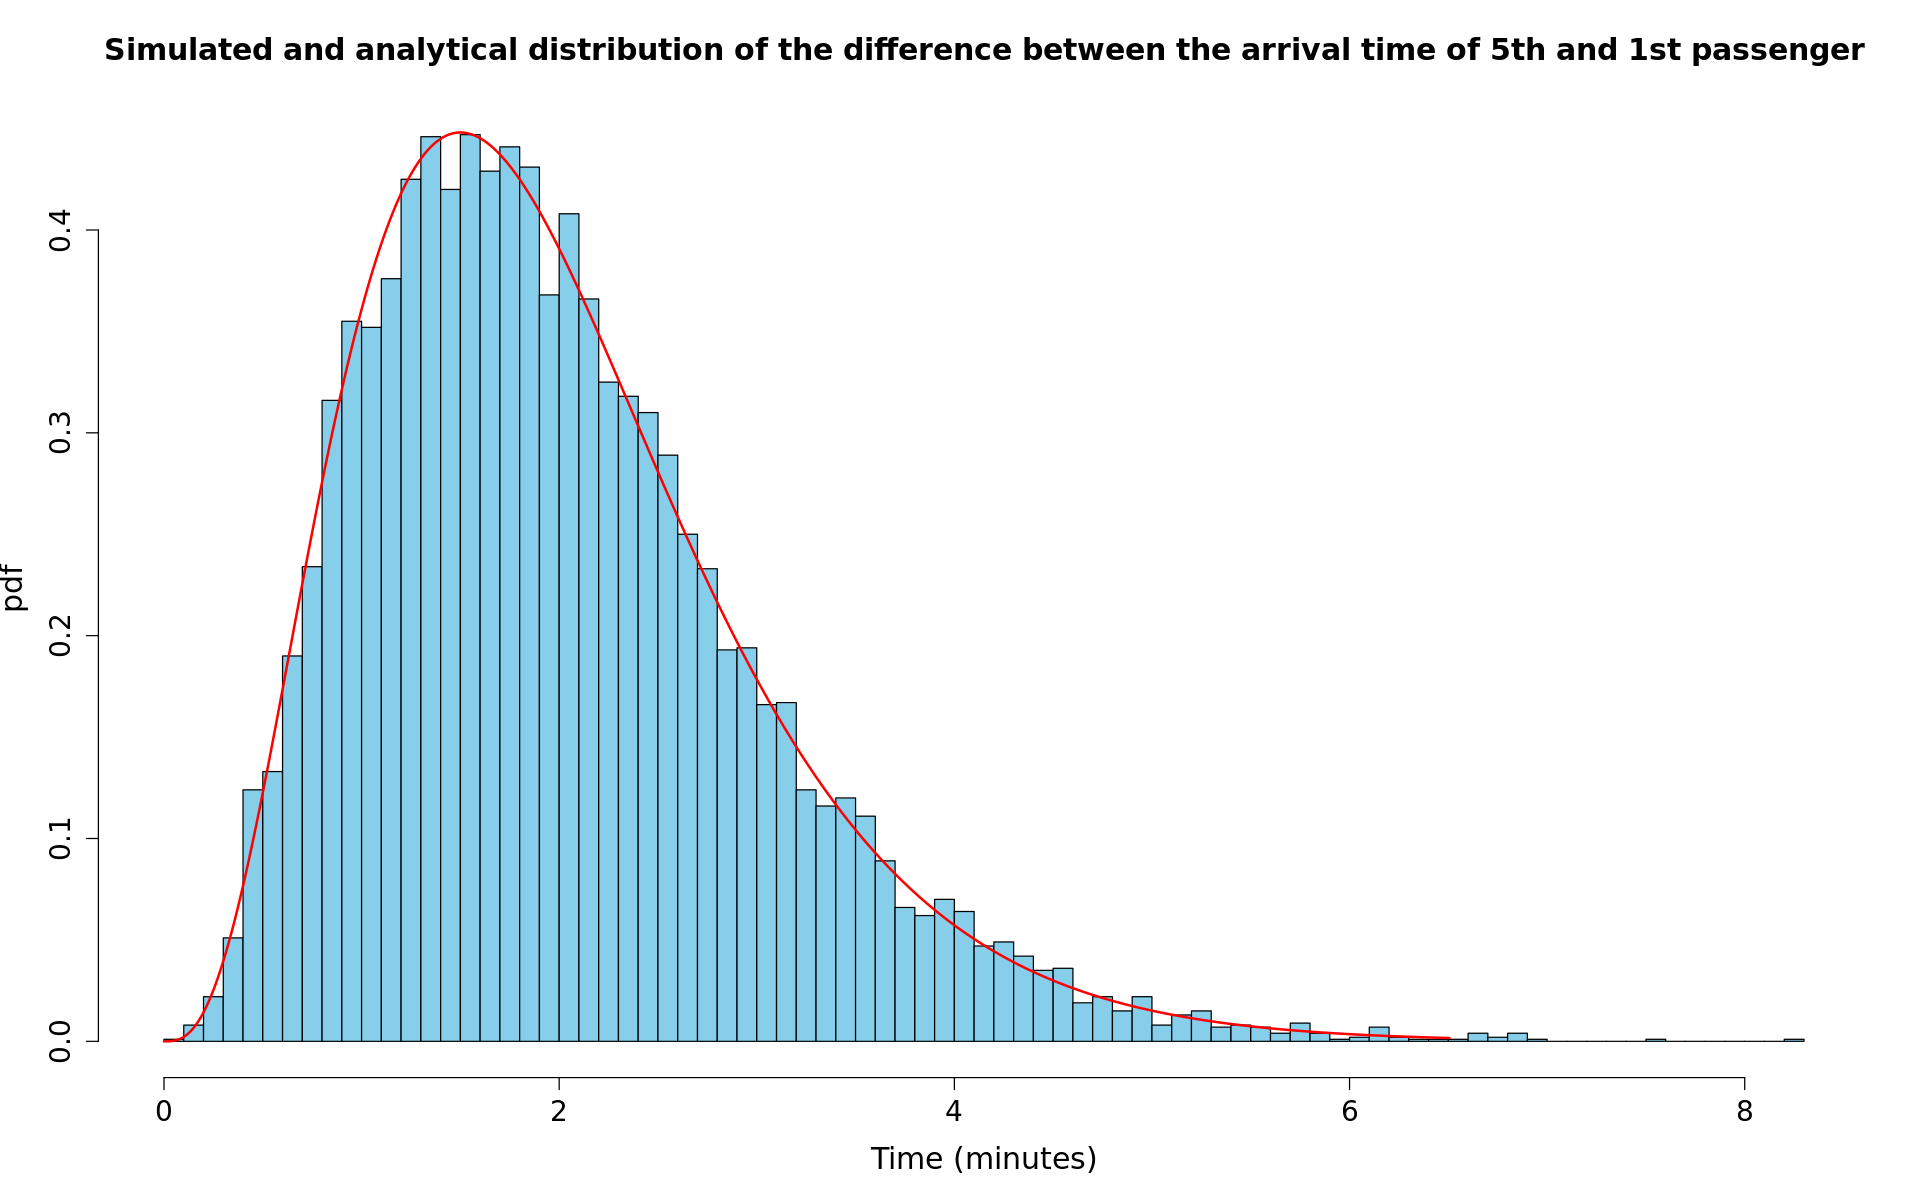

In [42]:
pdf <- dgamma(x,4,lambda)

sample_times <- rgamma(10000,4,lambda)

hist(sample_times,breaks=60,probability = TRUE,col='skyblue',xlab='Time (minutes)',ylab='pdf',
     main='Simulated and analytical distribution of the difference between the arrival time of 5th and 1st passenger',
     cex.axis=1.4,cex.lab=1.5, cex.main = 1.5);
lines(x,pdf,type='l',col='red',lwd=2)
